In [1]:
import pandas as pd
import csv
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./loan_default_preprocessed.csv', on_bad_lines='warn')
df

,Unnamed: 0,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,issue_date_category_label,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,earliest_credit_line_category_label,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,last_credit_pull_date_category_label,repay_fail
0,0,0.0,0.0,0.00000,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,2,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,5,0.0,NOT AVAILABLE,NaN,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,0,1
1,1,2500.0,2500.0,2500.00000,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,0,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,6,5.0,NOT AVAILABLE,NaN,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,2,0
2,2,5000.0,5000.0,5000.00000,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,0,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,4,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1,1
3,3,7000.0,7000.0,7000.00000,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,5,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,1,0
4,4,2000.0,2000.0,2000.00000,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,3,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,37354,3000.0,3000.0,3000.00000,36 months,0,11.99,99.63,3 years,3,RENT,4,74250.0,Verified,1,13.024658,10 to 15 years ago,0,Fully Paid,7,credit_card,1,CO,5,22.17,0.0,24.613699,20 to 30 years ago,5,2.0,NOT AVAILABLE,NaN,7,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,1,10.021918,100.30,8.186301,less than 10 years ago,2,0
37355,37355,10400.0,10400.0,10400.00000,36 months,0,13.49,352.88,9 years,9,RENT,4,62000.0,Source Verified,2,13.024658,10 to 15 years ago,0,Fully Paid,7,credit_card,1,OH,34,11.57,0.0,25.367123,20 to 30 years ago,5,1.0,NOT AVAILABLE,NaN,7,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,2,9.936986,393.08,8.186301,less than 10 years ago,2,0
37356,37356,16000.0,10550.0,10531.35818,60 months,1,14.96,250.77,10+ years,10,MORTGAGE,0,95088.0,Source Verified,2,14.276712,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NJ,30,10.63,0.0,28.701370,

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
# copy to new df
loan_df = df.copy()
loan_df

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,issue_date_category_label,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,earliest_credit_line_category_label,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,last_credit_pull_date_category_label,repay_fail
0,0.0,0.0,0.00000,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,2,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,5,0.0,NOT AVAILABLE,NaN,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,0,1
1,2500.0,2500.0,2500.00000,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,0,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,6,5.0,NOT AVAILABLE,NaN,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,2,0
2,5000.0,5000.0,5000.00000,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,0,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,4,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1,1
3,7000.0,7000.0,7000.00000,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,5,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,1,0
4,2000.0,2000.0,2000.00000,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,3,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,0,11.99,99.63,3 years,3,RENT,4,74250.0,Verified,1,13.024658,10 to 15 years ago,0,Fully Paid,7,credit_card,1,CO,5,22.17,0.0,24.613699,20 to 30 years ago,5,2.0,NOT AVAILABLE,NaN,7,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,1,10.021918,100.30,8.186301,less than 10 years ago,2,0
37355,10400.0,10400.0,10400.00000,36 months,0,13.49,352.88,9 years,9,RENT,4,62000.0,Source Verified,2,13.024658,10 to 15 years ago,0,Fully Paid,7,credit_card,1,OH,34,11.57,0.0,25.367123,20 to 30 years ago,5,1.0,NOT AVAILABLE,NaN,7,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,2,9.936986,393.08,8.186301,less than 10 years ago,2,0
37356,16000.0,10550.0,10531.35818,60 months,1,14.96,250.77,10+ years,10,MORTGAGE,0,95088.0,Source Verified,2,14.276712,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NJ,30,10.63,0.0,28.701370,20 to 30 years ago,5,1.0,NOT AVAILABLE,NaN,

In [6]:
X = loan_df[['total_received_principal','total_payment_investors','total_payment','last_payment_amnt','annual_income','revolving_balance','loan_amount','funded_amount','funded_amount_investors','loan_status_label']]
y = loan_df['repay_fail']

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

logi_res = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
# Train the model on the training set
logi_res.fit(X_train, y_train)

score_lr = logi_res.score(X_test, y_test)
lr_predictions = logi_res.predict(X_test)

# evaluate model on the test set
# calculate accuracy
print("Accuracy:", score_lr)
# calculate precision
print(f"Precision : {precision_score(y_test, lr_predictions)}")
# calculate recall
print(f"Recall : {recall_score(y_test, lr_predictions)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, lr_predictions)}")


Accuracy: 0.9936830835117773
Precision : 0.990558615263572
Recall : 0.9640122511485452
F1 Score: 0.9771051610399689


c:\Users\Owner\Documents\Nadia-docs\Python Technical Assessment\python-technical-assessment\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Owner\Documents\Nadia-docs\Python Technical Assessment\python-technical-assessment\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[8022   12]
 [  47 1259]]


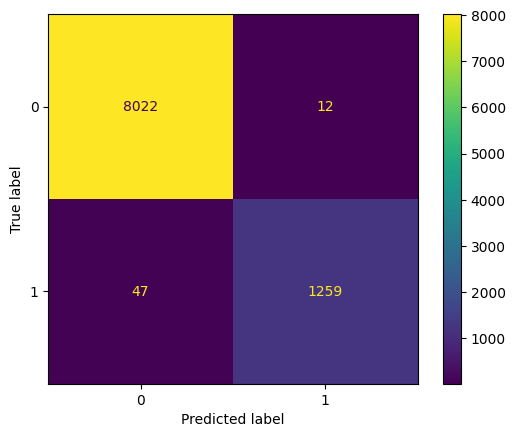

In [9]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, lr_predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, lr_predictions, labels=logi_res.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logi_res.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1259
# True Negatives = 8022
# False Positives = 12
# False Negatives = 47

Artificial Neural Network

In [10]:
import sklearn.neural_network 
# Create an instance of the MLPClassifier class
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')
 # Fit the model to the training data 
neural_network.fit(X_train, y_train)

score_nn = neural_network.score(X_test, y_test)
nn_predictions = neural_network.predict(X_test) 

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_nn)
# calculate precision
print(f"Precision : {precision_score(y_test, nn_predictions)}")
# calculate recall
print(f"Recall : {recall_score(y_test, nn_predictions)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, nn_predictions)}")

Accuracy: 0.9809421841541756
Precision : 0.9991150442477876
Recall : 0.8644716692189893
F1 Score: 0.9269293924466339


[[8033    1]
 [ 177 1129]]


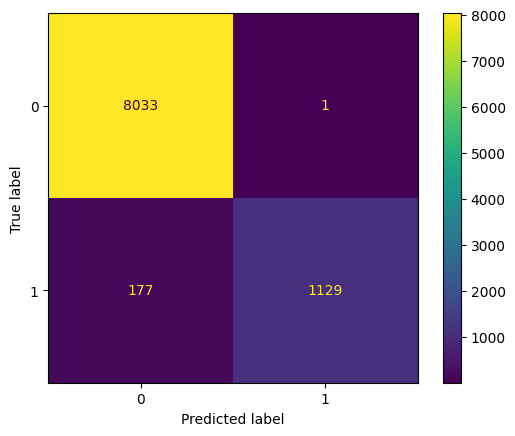

In [11]:
print(confusion_matrix(y_test, nn_predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, nn_predictions, labels=neural_network.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neural_network.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1129
# True Negatives = 8033
# False Positives = 1
# False Negatives = 177

Support Vector Machine

In [12]:
import sklearn.svm 
# Create an instance of the SVC class 
svm = sklearn.svm.SVC(kernel='linear', C=1.0) 
# Fit the model to the training data 
svm.fit(X_train, y_train) 

score_svm = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_svm)
# calculate precision
print(f"Precision : {precision_score(y_test, svm_predictions)}")
# calculate recall
print(f"Recall : {recall_score(y_test, svm_predictions)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, svm_predictions)}")

Accuracy: 0.9946466809421841
Precision : 0.9937106918238994
Recall : 0.9678407350689127
F1 Score: 0.9806051202482544


[[8026    8]
 [  42 1264]]


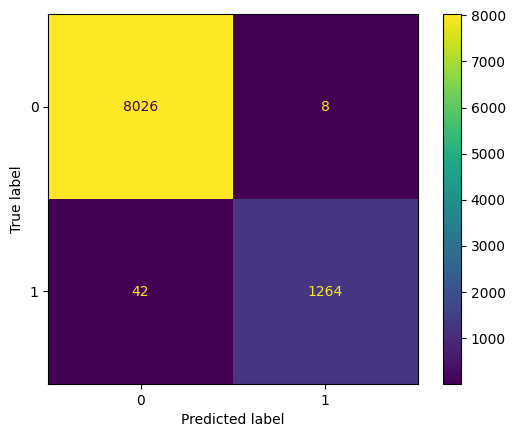

In [13]:
print(confusion_matrix(y_test, svm_predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, svm_predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1402
# True Negatives = 7932
# False Positives = 2
# False Negatives = 4

Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_prediction = nb.predict(X_test)
score_nb = accuracy_score(y_test, nb_prediction)

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_nn)
# calculate precision
print(f"Precision : {precision_score(y_test, nb_prediction)}")
# calculate recall
print(f"Recall : {recall_score(y_test, nb_prediction)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, nb_prediction)}")

Accuracy: 0.9809421841541756
Precision : 0.9695787831513261
Recall : 0.9517611026033691
F1 Score: 0.9605873261205564


[[7995   39]
 [  63 1243]]


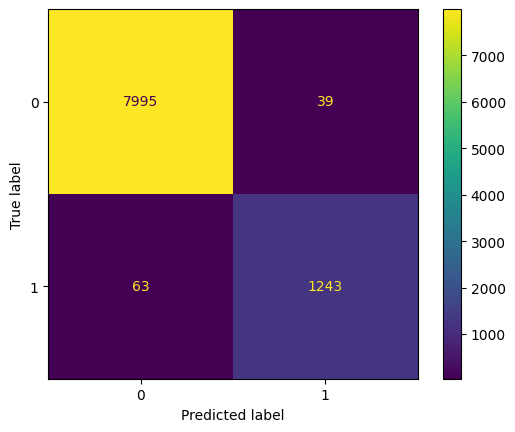

In [15]:
print(confusion_matrix(y_test, nb_prediction))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, nb_prediction, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1406
# True Negatives = 7934
# False Positives = 0
# False Negatives = 0

K-Nearest Neighbours

In [16]:
# knn = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
score_knn = accuracy_score(y_test, knn_predictions)

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_knn)
# calculate precision
print(f"Precision : {precision_score(y_test, knn_predictions)}")
# calculate recall
print(f"Recall : {recall_score(y_test, knn_predictions)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, knn_predictions)}")

Accuracy: 0.9541755888650963
Precision : 0.9730603448275862
Recall : 0.6914241960183767
F1 Score: 0.8084153983885407


[[8009   25]
 [ 403  903]]


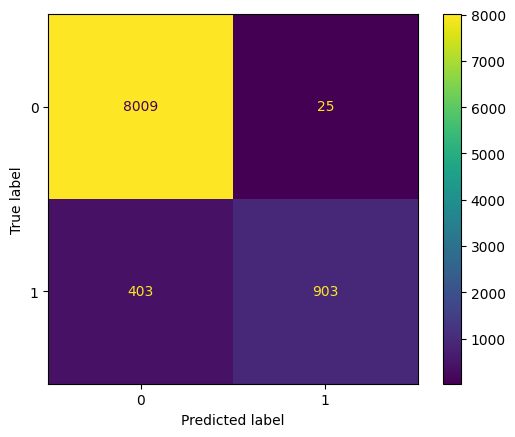

In [17]:
print(confusion_matrix(y_test, knn_predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1288
# True Negatives = 7923
# False Positives = 11
# False Negatives = 118

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_prediction = dt.predict(X_test)
score_dt = accuracy_score(y_test, dt_prediction)

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_dt)
# calculate precision
print(f"Precision : {precision_score(y_test, dt_prediction)}")
# calculate recall
print(f"Recall : {recall_score(y_test, dt_prediction)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, dt_prediction)}")

Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1 Score: 1.0


[[8034    0]
 [   0 1306]]


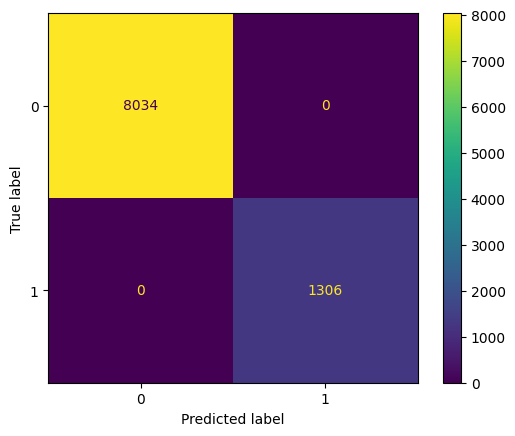

In [19]:
print(confusion_matrix(y_test, dt_prediction))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, dt_prediction, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1406
# True Negatives = 7934
# False Positives = 0
# False Negatives = 0

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_prediction = rf.predict(X_test)
score_rf = accuracy_score(y_test, rf_prediction)

# Evaluate the model on the test set
# calculate accuracy
print("Accuracy:", score_rf)
# calculate precision
print(f"Precision : {precision_score(y_test, rf_prediction)}")
# calculate recall
print(f"Recall : {recall_score(y_test, rf_prediction)}")
# calculate F1 score
print(f"F1 Score: {f1_score(y_test, rf_prediction)}")

Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1 Score: 1.0


[[8034    0]
 [   0 1306]]


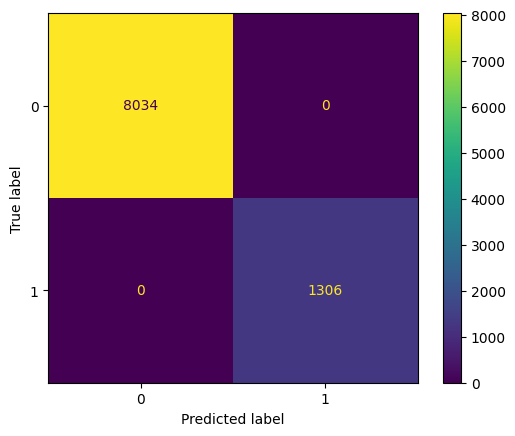

In [21]:
print(confusion_matrix(y_test, rf_prediction))

# plot_confusion_matrix function is used to visualize the confusion matrix
cm = confusion_matrix(y_test, rf_prediction, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

# based on results
# True Positives = 1406
# True Negatives = 7934
# False Positives = 0
# False Negatives = 0